<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#VarianceComponentModels.jl" data-toc-modified-id="VarianceComponentModels.jl-1">VarianceComponentModels.jl</a></span><ul class="toc-item"><li><span><a href="#Package-Features" data-toc-modified-id="Package-Features-1.1">Package Features</a></span></li><li><span><a href="#Installation" data-toc-modified-id="Installation-1.2">Installation</a></span></li></ul></li><li><span><a href="#Heritability-Analysis" data-toc-modified-id="Heritability-Analysis-2">Heritability Analysis</a></span><ul class="toc-item"><li><span><a href="#Install-packages-for-the-tutorial" data-toc-modified-id="Install-packages-for-the-tutorial-2.1">Install packages for the tutorial</a></span></li><li><span><a href="#Data-files" data-toc-modified-id="Data-files-2.2">Data files</a></span></li><li><span><a href="#Read-in-binary-SNP-data" data-toc-modified-id="Read-in-binary-SNP-data-2.3">Read in binary SNP data</a></span></li><li><span><a href="#Summary-statistics-of-SNP-data" data-toc-modified-id="Summary-statistics-of-SNP-data-2.4">Summary statistics of SNP data</a></span></li><li><span><a href="#Empirical-kinship-matrix" data-toc-modified-id="Empirical-kinship-matrix-2.5">Empirical kinship matrix</a></span></li><li><span><a href="#Simulating-phenotypes" data-toc-modified-id="Simulating-phenotypes-2.6">Simulating phenotypes</a></span></li><li><span><a href="#Phenotypes" data-toc-modified-id="Phenotypes-2.7">Phenotypes</a></span></li><li><span><a href="#Pre-processing-data-for-heritability-analysis" data-toc-modified-id="Pre-processing-data-for-heritability-analysis-2.8">Pre-processing data for heritability analysis</a></span></li><li><span><a href="#Save-intermediate-results" data-toc-modified-id="Save-intermediate-results-2.9">Save intermediate results</a></span></li><li><span><a href="#Heritability-of-single-traits" data-toc-modified-id="Heritability-of-single-traits-2.10">Heritability of single traits</a></span></li><li><span><a href="#Pairwise-traits" data-toc-modified-id="Pairwise-traits-2.11">Pairwise traits</a></span></li><li><span><a href="#3-trait-analysis" data-toc-modified-id="3-trait-analysis-2.12">3-trait analysis</a></span></li><li><span><a href="#Save-analysis-results" data-toc-modified-id="Save-analysis-results-2.13">Save analysis results</a></span></li></ul></li></ul></div>

# Heritability Analysis via `VarianceComponentModels.jl`

**Lange Symposium**

**Juhyun Kim, juhkim111@ucla.edu**

**Department of Biostatistics, UCLA**

**Feb 22, 2020**

Machine information:

In [1]:
versioninfo()

Julia Version 1.3.1
Commit 2d5741174c (2019-12-30 21:36 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.6.0)
  CPU: Intel(R) Core(TM) i5-6267U CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, skylake)


## VarianceComponentModels.jl

[`VarianceComponentModels.jl`](https://github.com/OpenMendel/VarianceComponentModels.jl/) is a package that resides in [OpenMendel](https://github.com/OpenMendel) ecosystem. It implements computation routines for fitting and testing variance component model of form 

$$\text{vec}(Y) \sim \text{Normal}(XB, \Sigma_1 \otimes V_1 + \cdots + \Sigma_m \otimes V_m)$$

where $\otimes$ is the [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product). 




### Package Features 
* Maximum likelihood estimation (MLE) and restricted maximum likelihood estimation (REML) of mean parameters B and variance component parameters $Σ$
* Allow constraints in the mean parameters $B$
* Choice of optimization algorithms: [Fisher scoring](https://books.google.com/books?id=QYqeYTftPNwC&lpg=PP1&pg=PA142#v=onepage&q&f=false) and [minorization-maximization algorithm](http://hua-zhou.github.io/media/pdf/ZhouHuZhouLange19VCMM.pdf)
* [Heritability Analysis](https://openmendel.github.io/VarianceComponentModels.jl/latest/man/heritability/#Heritability-Analysis-1) in genetics

### Installation

This package requires Julia v0.7.0 or later, which can be obtained from https://julialang.org/downloads/ or by building Julia from the sources in the https://github.com/JuliaLang/julia repository.

The package has not yet been registered and must be installed using the repository location. Start julia and use the ] key to switch to the package manager REPL

```julia
(v1.3) pkg> add https://github.com/OpenMendel/VarianceComponentModels.jl.git
```

Use the backspace key to return to the Julia REPL.

## Heritability Analysis 

### Install packages for the tutorial

For this tutorial, we need package [`SnpArrays`](https://openmendel.github.io/SnpArrays.jl/latest/).

Package `SnpArrays` requires Julia v0.7 or later. The package has not yet been registered and must be installed using the repository location. Start julia and use the `]` key to switch to the package manager REPL: 

```julia
(v1.3) pkg> add https://github.com/OpenMendel/SnpArrays.jl
```

Other packages that we use for this tutorial (e.g. [`Glob`](https://github.com/vtjnash/Glob.jl) and [`PyPlot`](https://github.com/JuliaPy/PyPlot.jl)) are registered. Start julia and use the `]` key to switch to the package manager REPL: 

```julia 
(v1.3) pkg> add Glob, PyPlot
```

### Data files

For this analysis, we use a sample data set `EUR_subset` from `SnpArrays.jl` (https://openmendel.github.io/SnpArrays.jl/latest/#Example-data-1). This data set is available in the `data` folder of the package. 

`EUR_subset` contains **379** individuals and **54,051** SNPs. `EUR_subset.bed`, `EUR_subset.bim`, and `EUR_subset.fam` is a set of Plink files in binary format.

In [3]:
using SnpArrays

┌ Info: Precompiling SnpArrays [4e780e97-f5bf-4111-9dc4-b70aaf691b06]
└ @ Base loading.jl:1273


In [4]:
datapath = normpath(SnpArrays.datadir())

"/Users/juhyun-kim/.julia/dev/SnpArrays/data"

In [5]:
readdir(glob"EUR_subset.*", datapath)

LoadError: UndefVarError: @glob_str not defined

### Read in binary SNP data 

We use the [`SnpArrays.jl`](https://openmendel.github.io/SnpArrays.jl/latest) package to read in binary SNP data and compute the empirical kinship matrix. 

In [6]:
# read in genotype data from Plink binary file
const EUR_subset = SnpArray(SnpArrays.datadir("EUR_subset.bed"))

379×54051 SnpArray:
 0x03  0x03  0x03  0x02  0x02  0x03  …  0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x02  0x03  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x03  0x03  0x03     0x02  0x02  0x02  0x03  0x03  0x02
 0x03  0x03  0x03  0x00  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x00  0x03  0x03     0x02  0x02  0x02  0x03  0x03  0x03
 0x02  0x03  0x03  0x03  0x03  0x03  …  0x03  0x03  0x03  0x03  0x03  0x02
 0x02  0x03  0x03  0x02  0x02  0x03     0x03  0x03  0x02  0x02  0x03  0x03
 0x02  0x03  0x03  0x03  0x02  0x02     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x00  0x02  0x03     0x03  0x03  0x03  0x03  0x03  0x03
 0x02  0x03  0x03  0x02  0x03  0x02     0x03  0x03  0x03  0x03  0x03  0x03
 0x03  0x03  0x03  0x02  0x03  0x03  …  0x03  0x03  0x02  0x02  0x03  0x03
 0x03  0x03  0x03  0x02  0x03  0x03     0x03  0x03  0x03  0x03  0x03  0x02
 0x03  0x02  0x03  0x02  0x02  0x03     0x03  0x03  0x03  0x03  0x03  0x03
    ⋮

### Summary statistics of SNP data

In [17]:
nobs, nsnps = size(EUR_subset)

(379, 54051)

The positions of the missing data are evaluated by

In [32]:
mp = missingpos(EUR_subset)

379×54051 SparseArrays.SparseMatrixCSC{Bool,Int32} with 0 stored entries

Data set `EUR_subset` contains no missing genotypes. Note that `SnpArrays.jl` provides an option to impute missing genotypes by column mean if the data at hand had missing values. 

Minor allele frequencies (MAF) for each SNP.

In [9]:
maf_EUR = maf(EUR_subset)

54051-element Array{Float64,1}:
 0.09762532981530347
 0.01319261213720313
 0.04485488126649073
 0.48944591029023743
 0.32189973614775724
 0.09102902374670185
 0.3733509234828496 
 0.05277044854881263
 0.0554089709762533 
 0.11345646437994727
 0.20448548812664913
 0.16226912928759896
 0.27176781002638517
 ⋮                  
 0.341688654353562  
 0.13192612137203164
 0.24802110817941958
 0.21240105540897103
 0.12532981530343013
 0.13192612137203164
 0.07387862796833777
 0.07783641160949872
 0.13588390501319259
 0.0554089709762533 
 0.01319261213720313
 0.02638522427440637

In [10]:
# 5 number summary and average MAF (minor allele frequencies)
using Statistics
Statistics.quantile(maf_EUR, [0.0 .25 .5 .75 1.0]), mean(maf_EUR)

([0.01055408970976257 0.0395778364116095 … 0.29023746701846964 0.5], 0.17512796597018288)

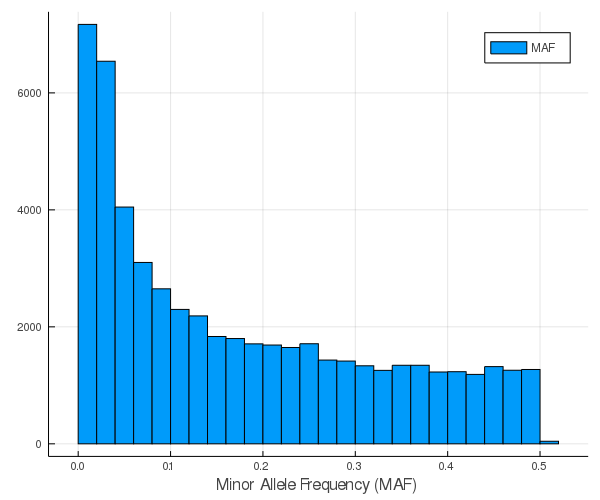

In [11]:
using Plots, PyPlot

gr(size=(600,500), html_output_format=:png)
histogram(maf_EUR, xlab = "Minor Allele Frequency (MAF)", label = "MAF")

In [14]:
# proportion of rare SNPs with maf < 0.05
count(!iszero, maf_EUR .< 0.05) / length(maf_EUR)

0.2914839688442397

### Empirical kinship matrix

We estimate empirical kinship based on all SNPs by the genetic relation matrix (GRM). If there are missing genotypes, they are imputed on the fly by drawing according to the minor allele frequencies.

In [15]:
## GRM using SNPs with maf > 0.01 (default) (~10 mins on my laptop)
using Random 
Random.seed!(123)
@time Φgrm = grm(EUR_subset; method = :GRM)

  2.168888 seconds (4.42 M allocations: 212.301 MiB, 3.98% gc time)


379×379 Array{Float64,2}:
  0.526913     -0.010026     -0.0012793    …   0.00536883    0.00713397 
 -0.010026      0.500049      0.00147092      -0.00178778   -0.00344277 
 -0.0012793     0.00147092    0.521904        -0.0109387    -0.00262695 
 -0.00239381    0.00550462    0.00755985      -0.00265867   -0.000141742
 -0.00391296    0.00422806    0.0222034       -0.0107694    -0.00248895 
 -0.000555581   0.000696874   0.0125771    …  -0.0100831    -0.00575495 
 -0.0095376     0.00231344   -0.00259641      -0.00282701    0.000732385
 -0.00823869    0.00556861    0.0060825       -0.00911662   -0.00638629 
  0.00117402   -0.00444907   -0.0029182       -0.00244795    0.00634087 
 -0.0111617     0.00436269    0.000537307     -0.00483523   -0.00621726 
 -0.00252813   -0.000626719   0.00753937   …  -0.00180836    0.00714953 
  0.0112036    -0.0024306     0.00446458      -0.00983116   -0.00296109 
 -0.000451414   0.00707358   -0.00620136      -0.00473171   -0.00720874 
  ⋮                      

### Simulating phenotypes 


We simulate phenotype vector from

$$\mathbf{y} \sim \text{Normal}(\mathbf{1}, 0.1 \widehat{\Phi} + 0.9 \mathbf{I})$$

where $\widehat{\Phi}$ is the estimated empirical kinship matrix `Φgrm`. 

The data should be available in `pheno.txt`.

In [20]:
# using LinearAlgebra, DelimitedFiles
# Random.seed!(1234)
# Ω = 0.1 * Φgrm + 0.9 * Matrix(1.0*I, nobs, nobs)
# Ωchol = cholesky(Symmetric(Ω))
# y = ones(nobs) + Ωchol.L * randn(nobs)
# writedlm("pheno.txt", y)

### Phenotypes 

Read in the phenotype data and plot a histogram.

In [21]:
using DelimitedFiles 

y = readdlm("pheno.txt")

379×1 Array{Float64,2}:
  1.846582104608307  
  0.12019614558345848
  0.5172368025545149 
  0.11933401051509984
  1.8407354203053767 
  3.155309404417616  
  1.518422163488851  
  0.737544574135081  
  1.4904102203720164 
  0.4942945743765427 
  0.4566487030521649 
  0.9830094325553045 
  1.1241872723791884 
  ⋮                  
  0.03800817892237962
  0.7685596964598539 
  0.9285816069462199 
 -1.3005655794765896 
  1.27142883079584   
  1.8149274022746835 
  2.353663701577899  
  1.3085170568729798 
  1.2023649250831836 
  2.523945778298307  
  2.339893360260807  
  0.08293644385047372

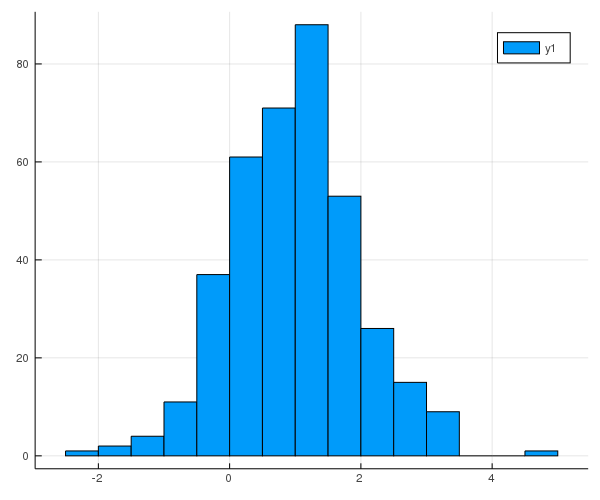

In [24]:
histogram(y)

### Pre-processing data for heritability analysis

To prepare variance component model fitting, we form an instance of VarianceComponentVariate. The two variance components are $(2\Phi, I)$.

In [28]:
using VarianceComponentModels, LinearAlgebra

# form data as VarianceComponentVariate
EURdata = VarianceComponentVariate(y, (2Φgrm, Matrix(1.0I, size(y, 1), size(y, 1))))
fieldnames(typeof(EURdata))

(:Y, :X, :V)

In [29]:
EURdata

VarianceComponentVariate{Float64,2,Array{Float64,2},Array{Float64,2},Array{Float64,2}}([1.846582104608307; 0.12019614558345848; … ; 2.339893360260807; 0.08293644385047372], Array{Float64}(undef,379,0), ([1.053826221313203 -0.020052039279012966 … 0.010737654900514952 0.014267936018676375; -0.020052039279012966 1.0000975487266066 … -0.0035755533910532874 -0.0068855303347012935; … ; 0.010737654900514952 -0.0035755533910532874 … 0.9859187797469418 0.02634099295946666; 0.014267936018676375 -0.0068855303347012935 … 0.02634099295946666 1.0243852451056223], [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0]))

Before fitting the variance component model, we pre-compute the eigen-decomposition of $2\Phi_{\text{GRM}}$, the rotated responses, and the constant part in log-likelihood, and store them as a TwoVarCompVariateRotate instance, which is re-used in various variane component estimation procedures.

In [32]:
# pre-compute eigen-decomposition 
@time EURdata_rotated = TwoVarCompVariateRotate(EURdata)
fieldnames(typeof(EURdata_rotated))

  0.070397 seconds (23 allocations: 3.434 MiB)


(:Yrot, :Xrot, :eigval, :eigvec, :logdetV2)

### Heritability of single traits 

We use Fisher scoring algorithm to fit variance component model for each single trait. 

In [34]:
fieldnames(typeof(EURdata_rotated))

(:Yrot, :Xrot, :eigval, :eigvec, :logdetV2)

In [35]:
# heritability from single trait analysis
hST = zeros(1)
# standard errors of estimated heritability
hST_se = zeros(1)
# additive genetic effects
σ2a = zeros(1)
# enviromental effects
σ2e = zeros(1)


# form data set for trait j
trait_data = TwoVarCompVariateRotate(EURdata_rotated.Yrot, 
    EURdata_rotated.Xrot, EURdata_rotated.eigval, EURdata_rotated.eigvec, 
    EURdata_rotated.logdetV2)
# initialize model parameters
trait_model = VarianceComponentModel(trait_data)
# estimate variance components
_, _, _, Σcov, = mle_fs!(trait_model, trait_data; solver=:Ipopt, verbose=false)
σ2a = trait_model.Σ[1][1]
σ2e = trait_model.Σ[2][1]
@show σ2a, σ2e
#h, hse = heritability(traitj_model.Σ, Σcov)
#heritability(traitj_model.Σ, Σcov)
#hST[trait] = h[1]
#hST_se[trait] = hse[1]



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

(σ2a, σ2e) = (2.4667887669561085e-31, 1.9170442095947509)


(2.4667887669561085e-31, 1.9170442095947509)

### Pairwise traits

Joint analysis of multiple traits is subject to intensive research recently. Following code snippet does joint analysis of all pairs of traits, a total of ?? bivariate variane component models.

In [ ]:
 additive genetic effects (2x2 psd matrices) from bavariate trait analysis;
Σa = Array{Matrix{Float64}}(13, 13)
# environmental effects (2x2 psd matrices) from bavariate trait analysis;
Σe = Array{Matrix{Float64}}(13, 13)

@time for i in 1:13
    for j in (i+1):13
        println(names(cg10k_trait)[i + 2], names(cg10k_trait)[j + 2])
        # form data set for (trait1, trait2)
        traitij_data = TwoVarCompVariateRotate(cg10kdata_rotated.Yrot[:, [i;j]], cg10kdata_rotated.Xrot, 
            cg10kdata_rotated.eigval, cg10kdata_rotated.eigvec, cg10kdata_rotated.logdetV2)
        # initialize model parameters
        traitij_model = VarianceComponentModel(traitij_data)
        # estimate variance components
        mle_fs!(traitij_model, traitij_data; solver=:Ipopt, verbose=false)
        Σa[i, j] = traitij_model.Σ[1]
        Σe[i, j] = traitij_model.Σ[2]
        @show Σa[i, j], Σe[i, j]
    end
end

### 3-trait analysis

Researchers want to jointly analyze traits 5-7. Our strategy is to try both Fisher scoring and MM algorithm with different starting point, and choose the best local optimum. We first form the data set and run Fisher scoring, which yields a final objective value -1.4700991+04.

In [ ]:
traitidx = 5:7
# form data set
trait57_data = TwoVarCompVariateRotate(cg10kdata_rotated.Yrot[:, traitidx], cg10kdata_rotated.Xrot, 
    cg10kdata_rotated.eigval, cg10kdata_rotated.eigvec, cg10kdata_rotated.logdetV2)
# initialize model parameters
trait57_model = VarianceComponentModel(trait57_data)
# estimate variance components
@time mle_fs!(trait57_model, trait57_data; solver=:Ipopt, verbose=true)
trait57_model

We then run the MM algorithm, starting from the Fisher scoring answer. MM finds an improved solution with objective value 8.955397e+03.

In [ ]:
# trait59_model contains the fitted model by Fisher scoring now
@time mle_mm!(trait57_model, trait57_data; verbose=true)
trait57_model

Do another run of MM algorithm from default starting point. It leads to a slightly better local optimum -1.470104e+04, slighly worse than the Fisher scoring result. Follow up anlaysis should use the Fisher scoring result.

In [ ]:
# default starting point
trait57_model = VarianceComponentModel(trait57_data)
@time _, _, _, Σcov, = mle_mm!(trait57_model, trait57_data; verbose=true)
trait57_model

Heritability from 3-variate estimate and their standard errors.

In [ ]:
h, hse = heritability(trait57_model.Σ, Σcov)
[h'; hse']

### Save analysis results

In [ ]:
#using JLD
#@save "copd.jld"
#whos()